In [2]:
import pandas as pd
import numpy as np
from sklearn import svm, metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [3]:
import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline

In [4]:
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if  platform.system() == 'Darwin':
    rc('font', family = 'AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname = path).get_name()
    rc('font', family = font_name)
else:
    print('Unknown system...Sorry')

In [5]:
test_set = pd.read_csv('C:.../5test_set.csv', encoding='euc-kr',engine='python')
train_set = pd.read_csv('C:.../5train_set2.csv', encoding='euc-kr',engine='python')

In [6]:
del test_set['Unnamed: 0']
del train_set['Unnamed: 0']

In [7]:
#컬럼 자르고 정규화하기
label_tr = train_set['label']
x_tr= train_set.iloc[:,0:12]
x_tr.head()

,풍속,풍향,gust,기압,습도,기온,수온,최대파고,유의파고,평균파고,파주기,파향
0,11.5,6.0,18.0,1015.5,84.0,-2.5,8.0,3.6,2.4,1.7,6.4,131.0
1,9.2,357.0,12.0,1020.1,91.0,4.5,13.1,2.3,1.5,1.0,10.7,266.0
2,4.2,31.0,5.4,1012.7,87.0,25.2,26.5,2.3,1.4,1.0,5.8,161.0
3,4.8,262.0,5.8,1008.5,89.0,20.0,19.0,0.6,0.4,0.3,2.3,218.0
4,12.7,29.0,15.9,1021.2,75.0,10.2,15.1,1.8,1.0,0.7,4.3,202.0


In [8]:
#컬럼 자르고 정규화하기
label_t = test_set['label']
x_t = test_set.iloc[:,0:12]
x_t.head()

,풍속,풍향,gust,기압,습도,기온,수온,최대파고,유의파고,평균파고,파주기,파향
0,15.4,352.0,22.6,1010.6,81.0,5.4,14.7,12.7,8.0,4.0,6.4,16.0
1,7.0,211.0,7.9,1000.8,93.0,20.1,18.7,1.1,0.7,0.5,3.8,340.0
2,5.7,306.0,7.4,1019.0,97.0,7.0,6.2,0.6,0.3,0.2,3.6,274.0
3,5.7,185.0,6.9,1008.2,93.0,12.2,10.3,0.5,0.3,0.2,3.6,284.0
4,2.5,8.0,3.3,1018.0,97.0,16.1,17.0,0.8,0.5,0.2,4.3,289.0


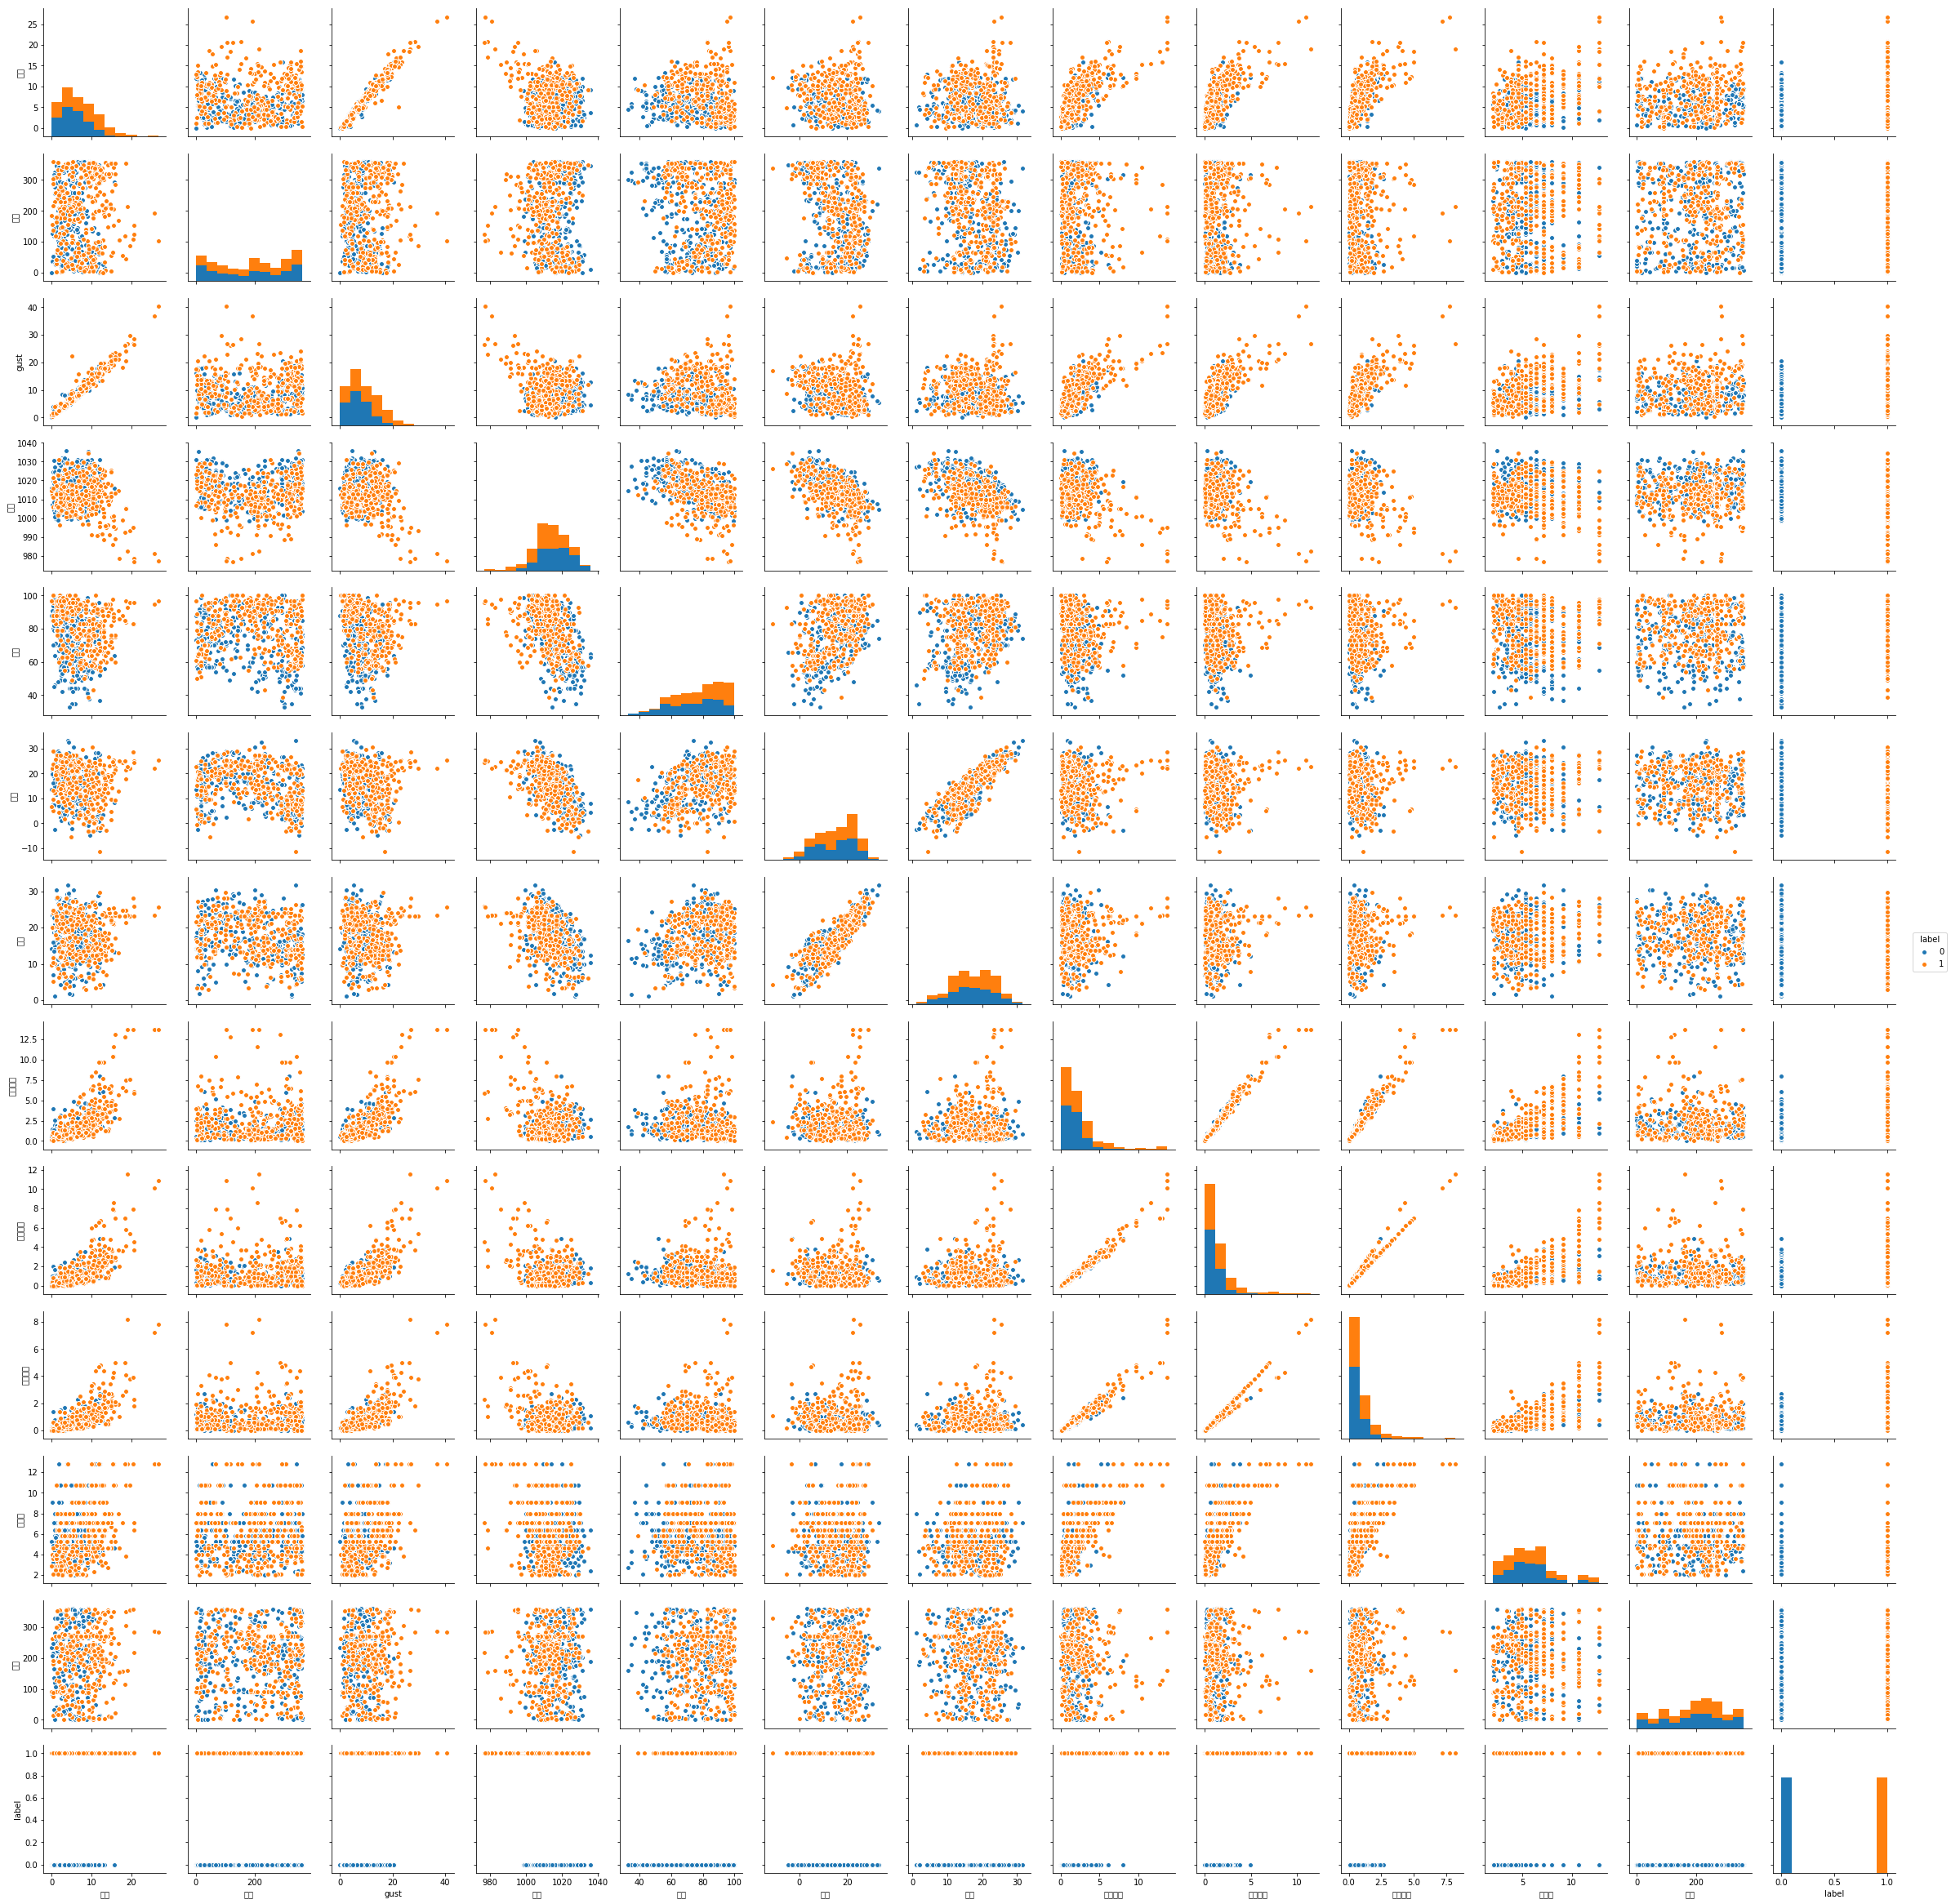

In [5]:
sns.pairplot(train_set, hue='label')

In [6]:
df = pd.DataFrame(train_set, columns=train_set.columns[:4])
df['label'] = train_set['label']

In [8]:
#다차원실수형 데이터
# 각 데이터 열의 조합에 대해 스캐터 플롯을 그린다. 같은 데이터가 만나는 대각선 영역에는 해당 데이터의 히스토그램을 그린다.

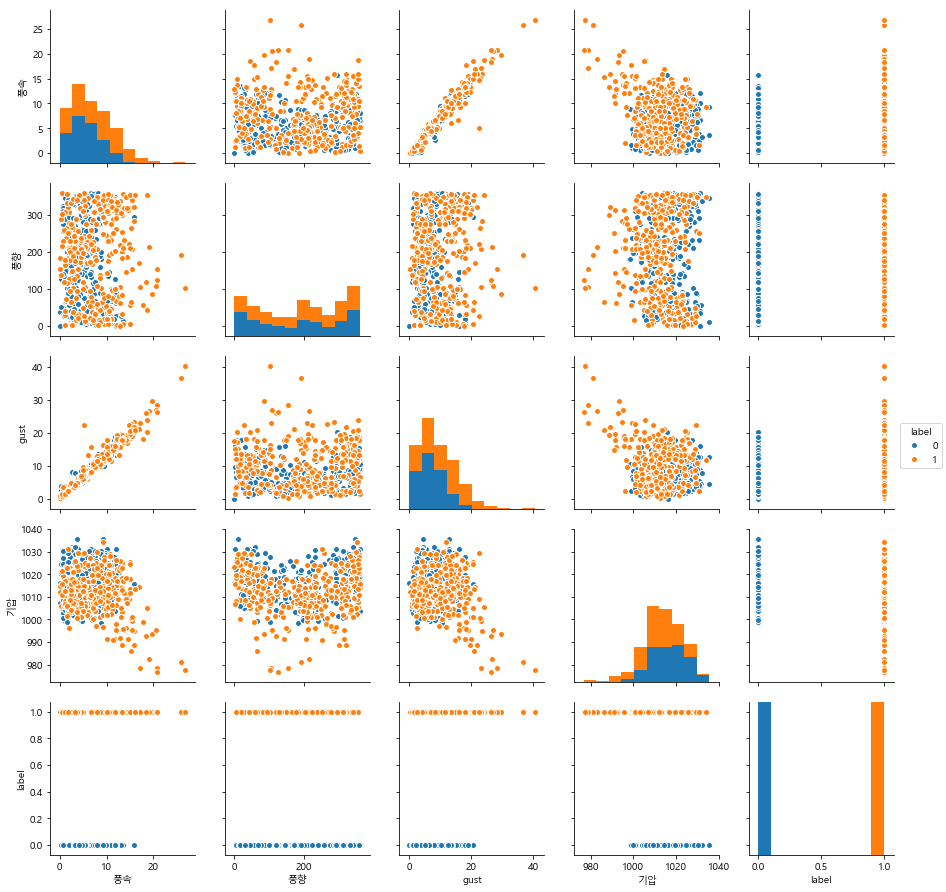

In [10]:
sns.pairplot(df, hue='label')

## random Forest

In [9]:
from sklearn.ensemble import RandomForestClassifier

In [63]:
#데이터 학습시키기
rdc = RandomForestClassifier(n_estimators=100, oob_score='Ture')
rdc.fit(x_tr, label_tr)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score='Ture', random_state=0, verbose=0, warm_start=False)

In [64]:
#데이터 예측하기
rdc_pred = rdc.predict(x_t)

In [65]:
#데이터 검증
print("\n *Confusion Matrix* \n")
print(confusion_matrix(label_t, rdc_pred))
print("\n *Classification Report* \n")
print(metrics.classification_report(label_t, rdc_pred))




 *Confusion Matrix* 

[[109835  47071]
 [    26     76]]

 *Classification Report* 

             precision    recall  f1-score   support

          0       1.00      0.70      0.82    156906
          1       0.00      0.75      0.00       102

avg / total       1.00      0.70      0.82    157008



In [78]:
list = []
name = []
for feature, imp in zip(x_tr.columns, rdc.feature_importances_):
    print(feature, imp)
    list.append(imp)
    name.append(feature)

풍속 0.11479427974685769
풍향 0.07646667206551133
gust 0.10941999882427243
기압 0.09875080787316866
습도 0.11290914104685801
기온 0.08254129534490862
수온 0.07540450522128345
최대파고 0.07105021433784313
유의파고 0.06144661802916665
평균파고 0.061616557942932776
파주기 0.06750460634883511
파향 0.06809530321836217


In [79]:
print(list, name)

[0.11479427974685769, 0.07646667206551133, 0.10941999882427243, 0.09875080787316866, 0.11290914104685801, 0.08254129534490862, 0.07540450522128345, 0.07105021433784313, 0.06144661802916665, 0.061616557942932776, 0.06750460634883511, 0.06809530321836217] ['풍속', '풍향', 'gust', '기압', '습도', '기온', '수온', '최대파고', '유의파고', '평균파고', '파주기', '파향']


In [80]:
impor = pd.DataFrame(list, name)

In [88]:
impor.rename(columns={impor.columns[0]:'imp'}, inplace=True)

In [89]:
impor

,imp
풍속,0.114794
풍향,0.076467
gust,0.109420
기압,0.098751
습도,0.112909
기온,0.082541
수온,0.075405
최대파고,0.071050
유의파고,0.061447
평균파고,0.061617


In [102]:
impor.sort_values(["imp"], ascending=[False])

,imp
풍속,0.114794
습도,0.112909
gust,0.109420
기압,0.098751
기온,0.082541
풍향,0.076467
수온,0.075405
최대파고,0.071050
파향,0.068095
파주기,0.067505


In [68]:
print(f'Out-of-bag score estimate: {rdc.oob_score_:.3}')

Out-of-bag score estimate: 0.69


In [13]:
rdc.oob_decision_function_

array([[0.14285714, 0.85714286],
       [0.3030303 , 0.6969697 ],
       [0.70731707, 0.29268293],
       ...,
       [0.45714286, 0.54285714],
       [0.34285714, 0.65714286],
       [0.82926829, 0.17073171]])

In [14]:
p = rdc.predict_proba(x_t)

In [15]:
p

array([[0.02, 0.98],
       [0.47, 0.53],
       [0.4 , 0.6 ],
       ...,
       [0.28, 0.72],
       [0.26, 0.74],
       [0.44, 0.56]])

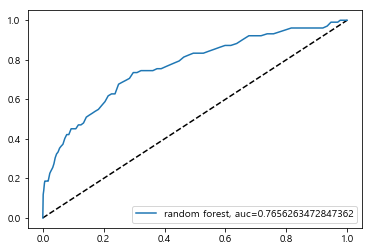

In [16]:
rdc_proba = rdc.predict_proba(x_t)[::,1]
fpr_rdc, tpr_rdc, _ = metrics.roc_curve(label_t,  rdc_proba)
plt.plot([0, 1], [0, 1], 'k--',)
auc_rdc = metrics.roc_auc_score(label_t, rdc_proba)
plt.plot(fpr_rdc,tpr_rdc,label="random forest, auc="+str(auc_rdc))
plt.legend(loc=4)
plt.show()



#### 변수중요도에서 낮은 영향력을 미친 유의파고, 평균파고를 제외한 분류기 생성

In [ ]:
test_set2 = pd.read_csv('C:/Users/hjo22/OneDrive/바탕 화면/종설/5test_set.csv', encoding='euc-kr',engine='python')
train_set2 = pd.read_csv('C:/Users/hjo22/OneDrive/바탕 화면/종설/5train_set2.csv', encoding='euc-kr',engine='python')

In [ ]:
del train_set2['Unnamed: 0']
del train_set2['유의파고']
del train_set2['평균파고']

del test_set2['Unnamed: 0']
del test_set2['유의파고']
del test_set2['평균파고']

In [138]:
#컬럼 자르고 정규화하기
label_tr2 = train_set2['label']
x_tr2= train_set2.iloc[:,0:10]
x_tr2.head()

,풍속,풍향,gust,기압,습도,기온,수온,최대파고,파주기,파향
0,11.5,6.0,18.0,1015.5,84.0,-2.5,8.0,3.6,6.4,131.0
1,9.2,357.0,12.0,1020.1,91.0,4.5,13.1,2.3,10.7,266.0
2,4.2,31.0,5.4,1012.7,87.0,25.2,26.5,2.3,5.8,161.0
3,4.8,262.0,5.8,1008.5,89.0,20.0,19.0,0.6,2.3,218.0
4,12.7,29.0,15.9,1021.2,75.0,10.2,15.1,1.8,4.3,202.0


In [139]:
#컬럼 자르고 정규화하기
label_t2 = test_set2['label']
x_t2 = test_set2.iloc[:,0:10]
x_t2.head()

,풍속,풍향,gust,기압,습도,기온,수온,최대파고,파주기,파향
0,15.4,352.0,22.6,1010.6,81.0,5.4,14.7,12.7,6.4,16.0
1,7.0,211.0,7.9,1000.8,93.0,20.1,18.7,1.1,3.8,340.0
2,5.7,306.0,7.4,1019.0,97.0,7.0,6.2,0.6,3.6,274.0
3,5.7,185.0,6.9,1008.2,93.0,12.2,10.3,0.5,3.6,284.0
4,2.5,8.0,3.3,1018.0,97.0,16.1,17.0,0.8,4.3,289.0


In [156]:
#데이터 학습시키기
rdc3 = RandomForestClassifier(n_estimators=100, oob_score='Ture')
rdc3.fit(x_tr2, label_tr2)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score='Ture', random_state=None, verbose=0,
            warm_start=False)

In [157]:
#데이터 예측하기
rdc3_pred = rdc3.predict(x_t2)

In [158]:
#데이터 검증
print("\n *Confusion Matrix* \n")
print(confusion_matrix(label_t2, rdc3_pred))
print("\n *Classification Report* \n")
print(metrics.classification_report(label_t2, rdc3_pred))


 *Confusion Matrix* 

[[107959  48947]
 [    30     72]]

 *Classification Report* 

             precision    recall  f1-score   support

          0       1.00      0.69      0.82    156906
          1       0.00      0.71      0.00       102

avg / total       1.00      0.69      0.81    157008



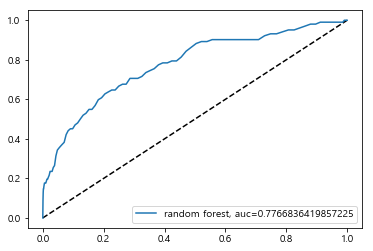

In [159]:
rdc3_proba = rdc3.predict_proba(x_t2)[::,1]
fpr_rdc3, tpr_rdc3, _ = metrics.roc_curve(label_t,  rdc3_proba)
plt.plot([0, 1], [0, 1], 'k--',)
auc_rdc3 = metrics.roc_auc_score(label_t, rdc3_proba)
plt.plot(fpr_rdc3,tpr_rdc3,label="random forest, auc="+str(auc_rdc3))
plt.legend(loc=4)
plt.show()

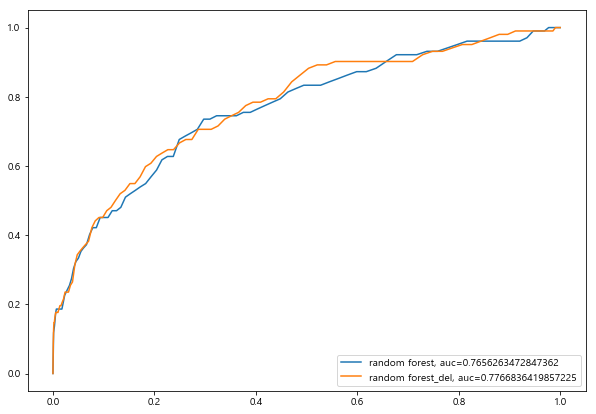

In [160]:
plt.figure(figsize=(10,7))
plt.plot(fpr_rdc,tpr_rdc,label="random forest, auc="+str(auc_rdc))
plt.plot(fpr_rdc3,tpr_rdc3,label="random forest_del, auc="+str(auc_rdc3))
plt.legend(loc=4)
plt.show()

In [162]:
print(f'Out-of-bag score estimate_rdc: {rdc.oob_score_:.3}')
print(f'Out-of-bag score estimate_rdc3: {rdc3.oob_score_:.3}')

Out-of-bag score estimate_rdc: 0.69
Out-of-bag score estimate_rdc3: 0.696
